Dataset: https://www.kaggle.com/datasets/kazanova/sentiment140

In [1]:
# pip install -U spacy
# pip install -U spacy-lookups-data
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

### General Feature Extraction
   - File loading
   - Word counts
   - Characters count
   - Average characters per word
   - Stop words count
   - Count #Hash Tags and @Mentions
   - if Numeric digits are present in twits
   - Upper case word counts



###  Preprocessing and Cleaning
   -  Lower case
   -  Contraction to Expansion
   -  Email removal and counts
   -  URLs removal and counts
   -  Removal of RT
   -  Removal of Special Characters
   -  Removal of multiple spaces
   -  Removal of HTML tags
   -  Removal of accented characters
   -  Removal of stop Words
   -  Conversion into base form of words
   -  Common Occurring words Removal
   -  Rare Occurring words Removal
   -  Word Cloud
   -  Spelling Correction
   -  Tokenization 
   -  Lemmatization
   -  Detecting Entities using NER
   -  Noun Detection
   -  Sentence Translation
   -  Using inbuilt `Sentiment Classifier`

### Advanced Text Processing and Feature Extraction
   - N-Gram, Bi-Gram etc
   - Bag of Words (BoW)
   - Term Frequency Calculation <mark>TF</mark>
   - Inverse Document Frequency <mark>IDF</mark>
   - `TF-IDF` Term Frequency-Inverse Document Frequency    
   - Word Embedding `Word2Vec` using Spacy

### Machine Learning Models for Text Classification
   - SGDClassifier
   - LogisticRegression
   - LogisticRegressionCV
   - LinearSVC
   - RandomForestClassifier

In [2]:
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('twitter16m.csv', encoding='latin1', header=None )

In [5]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [6]:
df = df[[5,0]]
df.columns = ['tweets', 'sentiment']

In [7]:
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0


In [8]:
# count unique value of a column
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [9]:
sent_map = {0: 'negative', 4:'positive'}

##### Word counts

In [10]:
# lambda function take input row by row in 'x' variable.
# some value may have numeric value that's why we use 'str()'
df['word_counts'] = df['tweets'].apply(lambda x: len(str(x).split())) 

In [11]:
df.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21


##### Characters count

In [12]:
df['char_counts'] = df['tweets'].apply(lambda x: len(x))

In [13]:
df.head()

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19,115
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21,111
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21,111


##### Average characters per word ( average word length)

In [14]:
def get_average_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len += len(word)
    return word_len/len(words) # != len(x)/len(words)

In [15]:
df['avg_word_len'] = df['tweets'].apply(lambda x: get_average_word_len(x))

In [16]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19,115,5.052632
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21,111,4.285714


##### Stop words count

In [17]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

2022-10-09 15:53:52.184348: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-09 15:53:53.765780: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-09 15:53:53.766154: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-09 15:53:53.766166: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-09 15:53:53.766180: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arafat-pc): /proc/driver/nvidia/version does not exist


In [18]:
# for finding the semantic meaning of a sentense, stopword is important.
# before delete stop word, think what you want to do.
print(STOP_WORDS)

{'which', 'nobody', 'whatever', '’d', 'he', 'three', 'for', 'along', 'sometimes', 'have', 'thereupon', 'mostly', 'side', 'except', 'n’t', 'become', '’m', 'through', 'out', 'this', 'up', "'re", 'same', 'our', 'each', 'yourselves', 'own', 'into', 'here', 'his', 'four', 'last', 'eleven', '‘re', 'put', 'formerly', 'just', 'but', 'see', '’s', 'everyone', 'herself', 'seems', 'herein', 'please', 'few', '’ll', 'ever', 'can', 'below', 'during', 'onto', 'after', 'without', 'within', 'namely', 'used', 'a', 'amongst', 'until', 'noone', '’ve', 'they', 'over', 'someone', 'already', 'say', 'hereby', 'fifty', 'nowhere', 'those', 'some', 'upon', 'anyway', 'beside', "'ll", 'had', 'too', 'does', 'several', 'one', 'elsewhere', "'m", 'across', 'hence', 'show', 'did', 'when', 'other', 'every', 'therefore', 'mine', 'twelve', 'nor', 'my', 'what', 'whereby', 'done', "'d", 'being', 'himself', 'eight', 'whenever', 'many', 'why', 'very', 'also', 'not', 'should', 'front', 'yours', 'more', 'down', 'indeed', 'amount

In [19]:
# example of creating a list that's contain stopwords and find the len of that list.
x = 'my name is arafat'
[word for word in x.split() if word in STOP_WORDS]

['my', 'name', 'is']

In [20]:
len([word for word in x.split() if word in STOP_WORDS])

3

In [21]:
df['stop_word_len'] =  df['tweets'].apply(lambda x: len([word for word in x.split() if word in STOP_WORDS]))

In [22]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21,111,4.285714,10


##### Count #Hash Tags and @Mentions

In [23]:
# EX:
x = 'this is #hashtag and this is @mention'
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [24]:
# string.startswith(value, start, end)
li = [word for word in x.split() if word.startswith('#')]
li

['#hashtag']

In [25]:
li = [word for word in x.split() if word.startswith(('#','@'))]
li

['#hashtag', '@mention']

In [26]:
li = [word for word in x.split() if word.startswith(('#','@'),0,3)]
li

['#hashtag', '@mention']

In [27]:
df['#_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.startswith('#')]))
df['@_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.startswith('@')]))

In [28]:
df.head()
#30 min

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21,111,4.285714,10,0,1


##### if Numeric digits are present in twits

In [29]:
df['numeric_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isdigit()]))

In [30]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21,111,4.285714,10,0,1,0


##### Upper case word counts

In [31]:
df['upper_counts'] = df['tweets'].apply(lambda x: len([word for word in x.split() if word.isupper() and len(x)>3 ]))

In [32]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,21,111,4.285714,10,0,1,0,1


In [33]:
df.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

In [34]:
df.loc[96]

tweets            so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL.....
sentiment                                                                                                                        0
word_counts                                                                                                                     21
char_counts                                                                                                                    112
avg_word_len                                                                                                              4.333333
stop_word_len                                                                                                                    3
#_counts                                                                                                                         0
@_counts                                                                           

# Preprocessing and Cleaning


##### Lower case

In [35]:
df['tweets'] = df['tweets'].apply(lambda x: x.lower())

In [36]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",0,21,111,4.285714,10,0,1,0,1


##### Contraction to Expansion

In [37]:
# don' = do not
x = "i don't know what you want, can't, he'll, i'd"
# 40 min

##### Email removal and counts

In [38]:
import re

In [39]:
x = 'hi, email me at arafat6462@gmail.com, you can also find me on 18-37576-1@student.aiub.edu'

In [40]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x)

['arafat6462@gmail.com', '18-37576-1@student.aiub.edu']

In [41]:
%%time
df['email'] = df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))

CPU times: user 4.94 s, sys: 34.7 ms, total: 4.97 s
Wall time: 4.97 s


In [42]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",0,19,115,5.052632,4,0,1,0,1,[]
1,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,0,21,111,4.285714,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,0,18,89,3.944444,7,0,1,0,1,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[]
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",0,21,111,4.285714,10,0,1,0,1,[]


In [43]:
df['email_counts'] = df['email'].apply(lambda x: len(x))

In [44]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",0,21,111,4.285714,10,0,1,0,1,[],0


In [45]:
# find which tweets has mail
df[df['email_counts']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :| who knows how much it is? im me: gabbehhramos@yahoo.com,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all the info already? if you did..maybe you could just email me stuff missataari@gmail.com,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that's kinda sad lol add me?? hello.kitty.65@hotmail.com,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error bug from a release last month, being fixed tonight. email press@linkedin.com for details",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


In [46]:
df.loc[4054] 

tweets            i want a new laptop.  hp tx2000 is the bomb. :| who knows how much it is? im me: gabbehhramos@yahoo.com
sentiment                                                                                                               0
word_counts                                                                                                            20
char_counts                                                                                                           103
avg_word_len                                                                                                         4.15
stop_word_len                                                                                                           6
#_counts                                                                                                                0
@_counts                                                                                                                0
numeric_counts          

In [47]:
# remove email
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '' ,x))

In [48]:
df.loc[4054] 

tweets            i want a new laptop.  hp tx2000 is the bomb. :| who knows how much it is? im me: 
sentiment                                                                                         0
word_counts                                                                                      20
char_counts                                                                                     103
avg_word_len                                                                                   4.15
stop_word_len                                                                                     6
#_counts                                                                                          0
@_counts                                                                                          0
numeric_counts                                                                                    0
upper_counts                                                                                      4


In [49]:
df[df['email_counts']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts
4054,i want a new laptop. hp tx2000 is the bomb. :| who knows how much it is? im me:,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all the info already? if you did..maybe you could just email me stuff,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that's kinda sad lol add me??,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error bug from a release last month, being fixed tonight. email for details",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


##### URLs removal and counts

In [50]:
# 52 min

In [51]:
x = 'hi, visit https://youtube.com/arafat6462 https://youtube.com'

In [52]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)


[('https', 'youtube.com', '/arafat6462'), ('https', 'youtube.com', '')]

In [53]:
df['url_flag'] = df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [54]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [55]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',"", x)


'hi, visit  '

In [56]:
# remove form dataframe
df['tweets'] = df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','', x))

In [57]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
0,"@switchfoot - awww, that's a bummer. you shoulda got david carr of third day to do it. ;d",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he can't update his facebook by texting it... and might cry as a result school today also. blah!,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. managed to save 50% the rest go out of bounds,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [58]:
df.loc[0]['tweets']

"@switchfoot  - awww, that's a bummer.  you shoulda got david carr of third day to do it. ;d"

##### Removal of RT (rt tweets)

In [59]:
df[50:100] 

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
50,broadband plan 'a massive broken promise' via www.diigo.com/~tautao still waiting for broadband we are,0,15,129,7.600000,4,0,0,0,0,[],0,1
51,"@localtweeps wow, tons of replies from you, may have to unfollow so i can see my friends' tweets, you're scrolling the feed a lot.",0,24,131,4.458333,11,0,1,0,1,[],0,0
52,our duck and chicken are taking wayyy too long to hatch,0,11,56,4.090909,5,0,0,0,0,[],0,0
53,"put vacation photos online a few yrs ago. pc crashed, and now i forget the name of the site.",0,19,93,3.894737,8,0,0,0,2,[],0,0
54,i need a hug,0,4,13,2.250000,1,0,0,0,1,[],0,0
55,"@andywana not sure what they are, only that they are pos! as much as i want to, i dont think can trade away company assets sorry andy!",0,27,135,4.000000,9,0,1,0,2,[],0,0
56,@oanhlove i hate when that happens...,0,6,38,5.333333,2,0,1,0,1,[],0,0
57,"i have a sad feeling that dallas is not going to show up i gotta say though, you'd think more shows would use music from the game. mmm",0,28,135,3.821429,13,0,0,0,2,[],0,0
58,ugh....92 degrees tomorrow,0,3,27,8.000000,0,0,0,0,0,[],0,0
59,where did u move to? i thought u were already in sd. ?? hmmm. random u found me. glad to hear yer doing well.,0,24,110,3.583333,7,0,0,0,1,[],0,0


In [60]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('rt','',x))

##### Removal of Special Characters (punctuation)

In [61]:
df['tweets'] = df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-_]+','',x))

In [62]:
df[50:100] 

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
50,broadband plan a massive broken promise via wwwdiigocomtautao still waiting for broadband we are,0,15,129,7.600000,4,0,0,0,0,[],0,1
51,localtweeps wow tons of replies from you may have to unfollow so i can see my friends tweets youre scrolling the feed a lot,0,24,131,4.458333,11,0,1,0,1,[],0,0
52,our duck and chicken are taking wayyy too long to hatch,0,11,56,4.090909,5,0,0,0,0,[],0,0
53,put vacation photos online a few yrs ago pc crashed and now i forget the name of the site,0,19,93,3.894737,8,0,0,0,2,[],0,0
54,i need a hug,0,4,13,2.250000,1,0,0,0,1,[],0,0
55,andywana not sure what they are only that they are pos as much as i want to i dont think can trade away company assets sorry andy,0,27,135,4.000000,9,0,1,0,2,[],0,0
56,oanhlove i hate when that happens,0,6,38,5.333333,2,0,1,0,1,[],0,0
57,i have a sad feeling that dallas is not going to show up i gotta say though youd think more shows would use music from the game mmm,0,28,135,3.821429,13,0,0,0,2,[],0,0
58,ugh92 degrees tomorrow,0,3,27,8.000000,0,0,0,0,0,[],0,0
59,where did u move to i thought u were already in sd hmmm random u found me glad to hear yer doing well,0,24,110,3.583333,7,0,0,0,1,[],0,0


##### Removal of multiple spaces `"   "`

In [63]:
x = 'The   Boy   in     the   Striped Pajamas.pdf is an excellent book'

In [64]:
" ".join(x.split())

'The Boy in the Striped Pajamas.pdf is an excellent book'

In [65]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join(x.split()))

##### Removal of HTML tags

In [66]:
#1.04 hour

In [67]:
from bs4 import BeautifulSoup

In [68]:
x = '<html><h2>The Boy in the Striped Pajamas</h2></html>'

In [69]:
BeautifulSoup(x,'lxml').get_text()

'The Boy in the Striped Pajamas'

In [70]:
%%time
# df['tweets'] = df['tweets'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


##### Removal of accented characters

In [71]:
x = 'a`ccE~`nted Tex`t'

In [72]:
import unicodedata

In [73]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii', 'ignore').decode('utf-8','ignore')

In [74]:
remove_accented_chars(x)

### Spacy and NLP

##### Removal of stop Words

In [75]:
import spacy

In [76]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [77]:
x = 'this is stop words removal code, is a an the how that what'

In [78]:
" ".join([word for word in x.split() if word not in STOP_WORDS])

'stop words removal code,'

In [79]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([word for word in x.split() if word not in STOP_WORDS]))

In [80]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
0,switchfoot - awww thats bummer shoulda got david carr day d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset cant update facebook texting cry result school today blah,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest bounds,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving im mad cant,0,21,111,4.285714,10,0,1,0,1,[],0,0


##### Conversion into base form of words (lemmatization)

In [81]:
#!python3 -m spacy download en_core_web_sm

In [82]:
nlp = spacy.load('en_core_web_sm')

In [83]:
x = 'i you he she they is am are'
y = 'kenichan dived times ball managed save 50 rest bounds'

In [84]:
# dive = dived, time = times, manag = managed

In [85]:
def make_to_base_form(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lem = str(token.lemma_)
        
        if lem == '-PRON-' or lem == 'be':
            lem = token.text
        x_list.append(lem)
    print(" ".join(x_list))
    

In [86]:
make_to_base_form(x)

I you he she they is am are


In [87]:
make_to_base_form(y)

kenichan dive times ball manage save 50 rest bound


In [88]:
# use it to this data take long time.
# do it here.........................



# ........

##### Common Occurring words Removal

In [89]:
df.head()['tweets']

0        switchfoot - awww thats bummer shoulda got david carr day d
1    upset cant update facebook texting cry result school today blah
2              kenichan dived times ball managed save 50 rest bounds
3                                         body feels itchy like fire
4                               nationwideclass behaving im mad cant
Name: tweets, dtype: object

In [90]:
' '.join(df['tweets'].head())

'switchfoot - awww thats bummer shoulda got david carr day d upset cant update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving im mad cant'

In [91]:
text = ' '.join(df['tweets'])

In [92]:
len(text)

73159505

In [93]:
text[:50]

'switchfoot - awww thats bummer shoulda got david c'

In [94]:
text = text.split()

In [95]:
len(text)

11303041

In [96]:
text[:5]

['switchfoot', '-', 'awww', 'thats', 'bummer']

In [97]:
frequent_word = pd.Series(text).value_counts()

In [98]:
f20 = frequent_word[:20]

In [99]:
f20

im       178268
good      89366
day       82297
like      77735
-         69656
dont      67278
today     64512
going     64077
love      63417
cant      62868
work      62804
got       60748
time      56080
lol       55094
u         52834
know      51171
want      42070
new       41995
think     41039
night     41029
dtype: int64

In [100]:
df['tweets'] = df['tweets'].apply(lambda x: " ".join([word for word in x.split() if word not in f20]))

In [101]:
check = ' '.join(df['tweets'])
check = check.split()
frequent_word = pd.Series(check).value_counts()
f20 = frequent_word[:20]
f20

amp         40614
thanks      39310
home        39168
oh          37971
2           37945
miss        36099
need        35524
morning     33117
hope        33053
great       32805
tomorrow    32664
ill         31777
twitter     31224
thats       30595
haha        30263
feel        30010
sad         28562
fun         27902
wish        27631
right       27288
dtype: int64

##### Rare Occurring words Removal

In [102]:
rare20 = frequent_word[-20:]

In [103]:
rare20

godisinthetv             1
ihwright                 1
zombiecaptnhook          1
anti-rheumatic           1
quotinfo-mercialsquot    1
movistar                 1
mizzdmain                1
kittu                    1
cryyyyyyyyyyyyy          1
newrepoer                1
daygta                   1
colesaw                  1
alexjus                  1
glothes                  1
lilyorso                 1
jamiewiborg              1
thebeckie                1
tendealons               1
materialslinks           1
speakinguph4h            1
dtype: int64

In [104]:
# find word in specific frequency count like all word occuring just 1 time or lass then 5 times.
rare = frequent_word[frequent_word.values <= 3]
rare

ampabout          3
jemmamb           3
pred              3
websdotcom        3
cathysayss        3
                 ..
jamiewiborg       1
thebeckie         1
tendealons        1
materialslinks    1
speakinguph4h     1
Length: 682076, dtype: int64

In [105]:
df['tweets'] = df['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare]))

In [106]:
text = " ".join(df['tweets'])
text = text.split()
len(text)

9112937

##### Word Cloud Visulization

In [107]:
!pip install wordcloud

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
type(text)

list

In [110]:
x = ' '.join(text[:20000])

In [111]:
x[:50]

'switchfoot awww thats bummer shoulda david carr d '

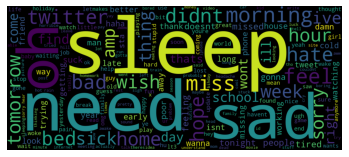

In [112]:
# shift + tab to show parameter option

wc = WordCloud(width=1400,height=600,).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

##### Spelling Correction

In [113]:
# !pip install -U textblob
# !python -m textblob.rpora 1.37

In [114]:
from textblob import TextBlob

In [115]:
x = 'tanks forr waching tihs vidio carr'

In [116]:
x = TextBlob(x).correct()
x

TextBlob("tanks for watching this video care")

##### Tokenization using Text blob

In [117]:
x = 'thanks#watching this video. please like it'

In [118]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

##### Tokenization using Spacy

In [119]:
doc = nlp(x)
for token in doc:
    print(token)

thanks#watching
this
video
.
please
like
it


##### Lemmatization using text blob

In [120]:
x = 'runs run running ran'

In [121]:
from textblob import Word

In [122]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


##### Lemmatization using Spacy


In [123]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


##### Detecting Entities using NER of Spacy

In [124]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [125]:
doc = nlp(x)
for ent in doc:
    print(ent.text+' - '+ent.lang_+' - '+str(spacy.explain(ent.lang_)))

Breaking - en - None
News - en - None
: - en - None
Donald - en - None
Trump - en - None
, - en - None
the - en - None
president - en - None
of - en - None
the - en - None
USA - en - None
is - en - None
looking - en - None
to - en - None
sign - en - None
a - en - None
deal - en - None
to - en - None
mine - en - None
the - en - None
moon - en - None


/home/arafat/anaconda3/lib/python3.9/site-packages/spacy/glossary.py:19: UserWarning: [W118] Term 'en' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


In [126]:
from spacy import displacy

In [127]:
displacy.render(doc, style='ent')

##### Noun Detection

In [128]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [129]:
for noun in doc.noun_chunks:
    print(noun)

News
Donald Trump
the president
the USA
a deal
the moon


##### Sentence Translation and language detection

In [130]:
tb = TextBlob(x)

In [131]:
# tb.translate(to='zh')
# tb.translate(to='bn')

##### Using inbuilt Sentiment Classifier

In [132]:
import textblob
from textblob.sentiments import NaiveBayesAnalyzer

In [133]:
x = 'we all stands together to fight with corona virus. we will win togather'

In [134]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [135]:
# tb.sentiment

# Advanced Text Processing and Feature Extraction

##### N-Gram, Bi-Gram etc

In [136]:
x = 'thanks for watching'

In [137]:
tb = TextBlob(x)

In [138]:
# uni-gram
tb.ngrams(1)

[WordList(['thanks']), WordList(['for']), WordList(['watching'])]

In [139]:
# bi-gram
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

In [140]:
# tri-gram
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

##### Bag of Words (BoW)

In [141]:
x = ['this is first sentense', 'this is second', 'this is third']

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [144]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [145]:
text_counts.toarray()

array([[1, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1, 1]])

In [146]:
cv.get_feature_names()

/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'second', 'sentense', 'third', 'this']

In [147]:
#make pandas dataframe
bow = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [148]:
bow

,first,is,second,sentense,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


In [149]:
x

['this is first sentense', 'this is second', 'this is third']

##### Term Frequency Calculation TF

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

In [150]:
bow.shape

(3, 6)

In [151]:
bow.shape[1]

6

In [152]:
tf = bow/bow.shape[1]

In [153]:
tf = bow.copy()

In [154]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col] = tf.loc[index, col]/sum(row[1].values)

In [155]:
tf

,first,is,second,sentense,third,this
0,0.25,0.250000,0.000000,0.25,0.000000,0.250000
1,0.00,0.333333,0.333333,0.00,0.000000,0.333333
2,0.00,0.333333,0.000000,0.00,0.333333,0.333333


##### Inverse Document Frequency IDF
    IDF = log((1+N)/(n+1))+1 used in sklearn when smooth_idf = True
    where, N is the total number of rows and n is the number of rows in which the word was present.

In [156]:
import numpy as np

In [157]:
x_df = pd.DataFrame(x, columns=['words'])

In [158]:
x_df

,words
0,this is first sentense
1,this is second
2,this is third


In [159]:
bow

,first,is,second,sentense,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


In [160]:
N = bow.shape[0]
N

3

In [161]:
bb = bow.astype('bool')
bb

,first,is,second,sentense,third,this
0,True,True,False,True,False,True
1,False,True,True,False,False,True
2,False,True,False,False,True,True


In [162]:
bb['first'].sum()

1

In [163]:
bb['is'].sum()

3

In [164]:
cols = bb.columns
cols

Index(['first', 'is', 'second', 'sentense', 'third', 'this'], dtype='object')

In [165]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [166]:
nz

[1, 3, 1, 1, 1, 3]

In [167]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

In [168]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [169]:
bow

,first,is,second,sentense,third,this
0,1,1,0,1,0,1
1,0,1,1,0,0,1
2,0,1,0,0,1,1


In [170]:
# TF-IDF


In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [172]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [173]:
x_tfidf

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [174]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.6088451 , 0.        ,
        0.35959372],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.        , 0.        , 0.76749457,
        0.45329466]])

In [175]:
# using sklearn
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [176]:
# using manual code
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

##### Word Embedding Word2Vec using Spacy
    Spacy word2Vec

In [177]:
# !python3 -m spacy download en_core_web_lg

In [178]:
nlp = spacy.load('en_core_web_lg')


In [179]:
doc = nlp('thank you! dog cat lion asdfsdf')

In [180]:
for token in doc:
    print(token.text, token.has_vector)

thank True
you True
! True
dog True
cat True
lion True
asdfsdf False


In [181]:
token.vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [182]:
token.vector.shape

(300,)

In [183]:
nlp('cat').vector

array([ 3.7032e+00,  4.1982e+00, -5.0002e+00, -1.1322e+01,  3.1702e-02,
       -1.0255e+00, -3.0870e+00, -3.7327e+00,  5.3875e-01,  3.5679e+00,
        6.9276e+00,  1.5793e+00,  5.1188e-01,  3.1868e+00,  6.1534e+00,
       -4.8941e+00, -2.9959e-01, -3.6276e+00,  2.3825e+00, -1.4402e+00,
       -4.7577e+00,  4.3607e+00, -4.9814e+00, -3.6672e+00, -1.8052e+00,
       -2.1888e+00, -4.2875e+00,  5.5712e+00, -5.2875e+00, -1.8346e+00,
       -2.2015e+00, -7.7091e-01, -4.8260e+00,  1.2464e+00, -1.7945e+00,
       -8.1280e+00,  1.9994e+00,  1.1413e+00,  3.8032e+00, -2.8783e+00,
       -4.2136e-01, -4.4177e+00,  7.7456e+00,  4.9535e+00,  1.7402e+00,
        1.8275e-01,  2.4218e+00, -3.1496e+00, -3.8057e-02, -2.9818e+00,
        8.3396e-01,  1.1531e+01,  3.5684e+00,  2.5970e+00, -2.8438e+00,
        3.2755e+00,  4.5674e+00,  3.2219e+00,  3.4206e+00,  1.1200e-01,
        1.0303e-01, -5.8396e+00,  4.6370e-01,  2.7750e+00, -5.3713e+00,
       -5.0247e+00, -2.0212e+00,  5.8772e-01,  1.1569e+00,  1.32

In [184]:
nlp('cat').vector.shape

(300,)

In [185]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

thank thank 1.0
thank you 0.26585453748703003
thank ! 0.29259735345840454
thank dog 0.061790868639945984
thank cat 0.04215025529265404
thank lion -0.13132092356681824
thank asdfsdf 0.0

you thank 0.26585453748703003
you you 1.0
you ! 0.3429550528526306
you dog 0.34409627318382263
you cat 0.27984926104545593
you lion 0.05796932056546211
you asdfsdf 0.0

! thank 0.29259735345840454
! you 0.3429550528526306
! ! 1.0
! dog 0.2505742013454437
! cat 0.20256751775741577
! lion -0.032366640865802765
! asdfsdf 0.0

dog thank 0.061790868639945984
dog you 0.34409627318382263
dog ! 0.2505742013454437
dog dog 1.0
dog cat 0.8220816850662231
dog lion 0.29493075609207153
dog asdfsdf 0.0

cat thank 0.04215025529265404
cat you 0.27984926104545593
cat ! 0.20256751775741577
cat dog 0.8220816850662231
cat cat 1.0
cat lion 0.3854507803916931
cat asdfsdf 0.0

lion thank -0.13132092356681824
lion you 0.05796932056546211
lion ! -0.032366640865802765
lion dog 0.29493075609207153
lion cat 0.3854507803916931
lion 

/tmp/ipykernel_742464/2807945866.py:3: UserWarning: [W008] Evaluating Token.similarity based on empty vectors.
  print(token1.text, token2.text, token1.similarity(token2))


# Machine Learning Models for Text Classification

In [186]:
df.shape

(1600000, 13)

In [187]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
0,switchfoot awww thats bummer shoulda david carr d,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result school blah,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan times ball managed save 50 rest bounds,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


In [188]:
# taking 2000 sample of 0 sentimant fro simplicity
df_0 = df[df['sentiment'] == 0].sample(2000)
df_4 = df[df['sentiment'] == 4].sample(2000)

In [192]:
dfr = df_0.append(df_4)

/tmp/ipykernel_742464/2558827070.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr = df_0.append(df_4)


In [193]:
dfr.shape

(4000, 13)

### Feature extraction
    

In [194]:
dfr

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email,email_counts,url_flag
205169,js,0,8,89,10.125000,0,0,0,0,0,[],0,0
651656,wont 24 ive known theres leave,0,21,130,5.190476,10,0,4,1,0,[],0,0
446222,miss ande kids crazy everyday hate reason,0,29,134,3.620690,17,0,0,0,1,[],0,0
772086,skie half waiting happen especially sinc deaths happened age,0,25,137,4.480000,13,0,1,0,1,[],0,0
771984,literally ruined,0,5,29,4.800000,2,0,0,0,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000359,says lingaw kaau ang nodame hehehe,4,8,74,8.250000,0,0,0,0,0,[],0,1
1200701,tired busy weekend watching hills season finale dropping car sleepover yay fixed cars,4,24,133,4.541667,8,0,0,0,0,[],0,0
1234956,kl wots gonna update saula story,4,10,64,5.400000,2,0,1,0,0,[],0,0
852795,,4,3,23,6.666667,0,0,1,0,0,[],0,0


In [219]:
dfr_feat = dfr.drop(labels=['tweets','sentiment','email','url_flag'], axis=1).reset_index(drop=True)

In [220]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email_counts
0,8,89,10.125000,0,0,0,0,0,0
1,21,130,5.190476,10,0,4,1,0,0
2,29,134,3.620690,17,0,0,0,1,0
3,25,137,4.480000,13,0,1,0,1,0
4,5,29,4.800000,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3995,8,74,8.250000,0,0,0,0,0,0
3996,24,133,4.541667,8,0,0,0,0,0
3997,10,64,5.400000,2,0,1,0,0,0
3998,3,23,6.666667,0,0,1,0,0,0


In [197]:
y = dfr['sentiment']

In [198]:
y

205169     0
651656     0
446222     0
772086     0
771984     0
          ..
1000359    4
1200701    4
1234956    4
852795     4
1416383    4
Name: sentiment, Length: 4000, dtype: int64

##### BOW

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

In [200]:
cv = CountVectorizer()

In [201]:
text_counts = cv.fit_transform(dfr['tweets'])

In [202]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [203]:
text_counts.toarray().shape

(4000, 7601)

In [204]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [206]:
dfr_bow.head(3)

,03,04,05,10,100,1000,10000,1002,100mb,100s,...,zelciia,zero,zip,zomg,zone,zoo,zoom,zozotheterrible,zunehd,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ML Algorithm

In [208]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [209]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv=2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [211]:
# creating dictionary to train all in one loop
clf = {'SGD':sgd, 'LGR':lgr, 'LGR-CV':lgrcv, 'SVM':svm, 'RFC':rfc}

In [212]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [214]:
def classify(X,y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    
    x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42, stratify=y)
    
    for key in clf.keys():
        clf[key].fit(x_train, y_train)
        y_pred = clf[key].predict(x_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ----> ",ac)

In [215]:
%%time
classify(dfr_bow,y)

SGD  ---->  0.6575
LGR  ---->  0.6825
LGR-CV  ---->  0.6775
SVM  ---->  0.65375
RFC  ---->  0.6675
CPU times: user 4min 36s, sys: 36.8 s, total: 5min 13s
Wall time: 42.2 s


### Manual feature

In [216]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email_counts
205169,8,89,10.125000,0,0,0,0,0,0
651656,21,130,5.190476,10,0,4,1,0,0


In [217]:
%%time
classify(dfr_feat,y)

SGD  ---->  0.565
LGR  ---->  0.5625
LGR-CV  ---->  0.56625
SVM  ---->  0.56
RFC  ---->  0.55125
CPU times: user 2.06 s, sys: 1.89 s, total: 3.95 s
Wall time: 776 ms


## Manual + BOW

In [221]:
X = dfr_feat.join(dfr_bow)
X

,word_counts,char_counts,avg_word_len,stop_word_len,#_counts,@_counts,numeric_counts,upper_counts,email_counts,03,...,zelciia,zero,zip,zomg,zone,zoo,zoom,zozotheterrible,zunehd,zzz
0,8,89,10.125000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,130,5.190476,10,0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,29,134,3.620690,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,137,4.480000,13,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,29,4.800000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8,74,8.250000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,24,133,4.541667,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,10,64,5.400000,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,3,23,6.666667,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
%%time
classify(X,y)

SGD  ---->  0.65375
LGR  ---->  0.68625
LGR-CV  ---->  0.68375
SVM  ---->  0.66125
RFC  ---->  0.65375
CPU times: user 4min 18s, sys: 1min 1s, total: 5min 20s
Wall time: 44.4 s


### TF-IDF

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [224]:
dfr.shape

(4000, 13)

In [225]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dfr['tweets'])

In [228]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGD  ---->  0.6475
LGR  ---->  0.67625
LGR-CV  ---->  0.67625
SVM  ---->  0.65125
RFC  ---->  0.67
CPU times: user 5min 24s, sys: 29.4 s, total: 5min 54s
Wall time: 46.7 s


## Word2Vec

In [229]:
def get_vec(x):
    doc = nlp(x)
    return doc.vector.reshape(1,-1)

In [230]:
%%time
dfr['vec'] = dfr['tweets'].apply(lambda x: get_vec(x))

CPU times: user 14.7 s, sys: 29.5 ms, total: 14.8 s
Wall time: 15 s


In [232]:
X = np.concatenate(dfr['vec'].to_numpy(), axis=0)

In [233]:
X.shape

(4000, 300)

In [234]:
%%time
classify(pd.DataFrame(X),y)

SGD  ---->  0.68125


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LGR  ---->  0.69625


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

LGR-CV  ---->  0.70125


/home/arafat/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM  ---->  0.6425
RFC  ---->  0.66
CPU times: user 32.1 s, sys: 29.6 s, total: 1min 1s
Wall time: 8.52 s


In [235]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key, " ---> ", y_pred)

In [236]:
predict_w2v('hi, thanks for watching this video, please like')

SGD  --->  [4]
LGR  --->  [4]
LGR-CV  --->  [4]
SVM  --->  [4]
RFC  --->  [0]


In [244]:
predict_w2v('i love you. you are so nice')

SGD  --->  [0]
LGR  --->  [4]
LGR-CV  --->  [0]
SVM  --->  [4]
RFC  --->  [0]


In [241]:
predict_w2v('hate, kill, revenge ugly bad')

SGD  --->  [0]
LGR  --->  [0]
LGR-CV  --->  [0]
SVM  --->  [0]
RFC  --->  [4]


In [243]:
predict_w2v('good beautiful play happy')

SGD  --->  [4]
LGR  --->  [4]
LGR-CV  --->  [4]
SVM  --->  [4]
RFC  --->  [4]
